# Human Resources Analytics with Machine Learning
__*by Binghuan Zhang*  
*March 26, 2017*__

## Content 
1. Data Expoloration
  - First Glance
  - Describing Data
  - Research Questions
2. Data Visualization
  - Heatmap
  - Other Featurs
3. Modeling Preparation
  - Feature Engineering
  - Assemble final datasets
4. Modeling
  - Define Model Scoring Functions
  - Logistic Regression
  - Decision Tree
  - Gaussian Naive Bayes
  - KNN (K Nearest Neighbors)
  - SVM (Support Vector Machines)
5. Evaluation
  - Results
  - Limitations and Next Step

## 1. Data Exploration
### 1.1 First Glance
Obtained from Kaggle: https://www.kaggle.com/ludobenistant/hr-analytics

Publish with us on Medium at https://medium.com/towards-data-science

Why are our best and most experienced employees leaving prematurely? Have fun with this database and try to predict which valuable employees will leave next. Fields in the dataset include:
- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

### 1.2 Describing Data

In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import random

# ingore warnings
import warnings
warnings.filterwarnings('ignore')

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True)

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# modelling Helpers
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.feature_selection import RFECV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
d = pd.read_csv('HR_comma_sep.csv')
d.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# data set is clean
d.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# there are some confusions about column names
# change time_spend_company -> time_spend_company_yrs
# change sales -> department
# change average_montly_hours -> avrage_monthly_hrs
# notice that here we can't use d = d.rename...
d.rename(index=str, columns={'time_spend_company':'time_spend_company_yrs', 'sales':'department', 'average_montly_hours':'average_monthly_hrs'}, inplace=True)
d.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hrs,time_spend_company_yrs,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# distribution of salary & department & distribution
print(d.salary.value_counts(), end='\n\n')
print(d.department.value_counts(), end='\n\n')
print(d.left.value_counts(), end='\n\n')
print(d.promotion_last_5years.value_counts())

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

0    11428
1     3571
Name: left, dtype: int64

0    14680
1      319
Name: promotion_last_5years, dtype: int64


### 1.3 Research Questions
The initial question asked by the dataset provider is why their best and most experienced employees leaving permaturely（过早的）? To answer this question, I want to split this big question into several smaller ones.

Taking a look at our data and some descriptive statistics, we can quickly calculate and see that over 95% of the employees didn't get a promotion over the last 5 years in the company while the average years they stayed in the company was less than 4 years. And 1/4 of the employees chose to leave. Whether they got a promotion or not could possibly lead to their choice of leaving.

In this data set, the __target__ is 'left'. All other features seem pretty relevant to to target, and possibly to each other. However, we can pick a few most obvious ones to start with:
- salary
- promotion
- satisfaction
- department
- average monthly hrs
- number of projects

With these features, we can analyze which feature has the most significant impact on "left".

## 2. Data Visualization
### 2.1 Heatmap
Creating a heatmap can quickly tell us the correlations between each pair of features.

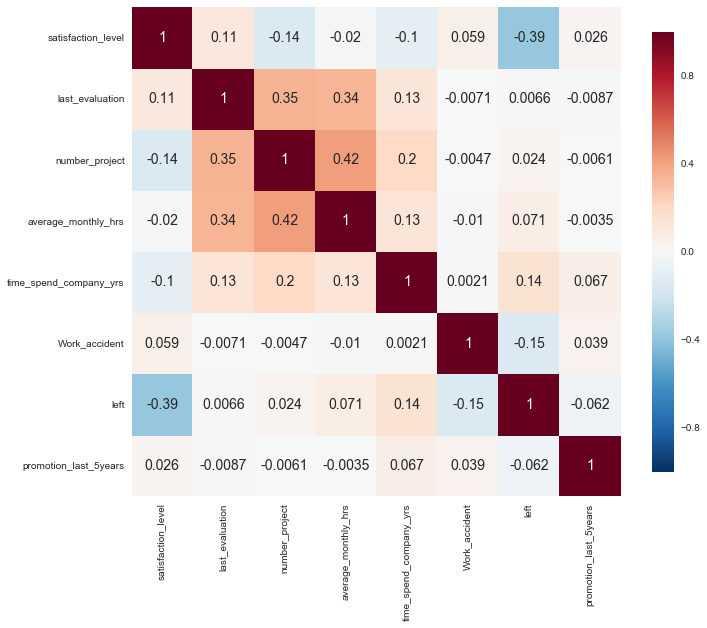

In [7]:
_, ax = plt.subplots(figsize =(11,9))
sns.heatmap(d.corr(), vmax=1, 
            annot=True, annot_kws = {'fontsize': 14}, 
            cbar_kws={ 'shrink' : 0.9 },
            square=True, 
            ax=ax)

From the above heatmap, we can see that 'average_monthly_hrs' and 'number_project' has the largest coefficient rate. Also, 'satisfaction_level' seems to have an impact on 'left'. 'promotion_last_5years' seems to have little impact on any other featurs.

### 2.2 Other Features
#### 2.2.1 Feature Distribution - stayed vs. left
First, comparing feature distributions between people who stayed and who left.

left
0    [[Axes(0.125,0.551739;0.158163x0.328261), Axes...
1    [[Axes(0.125,0.551739;0.158163x0.328261), Axes...
dtype: object

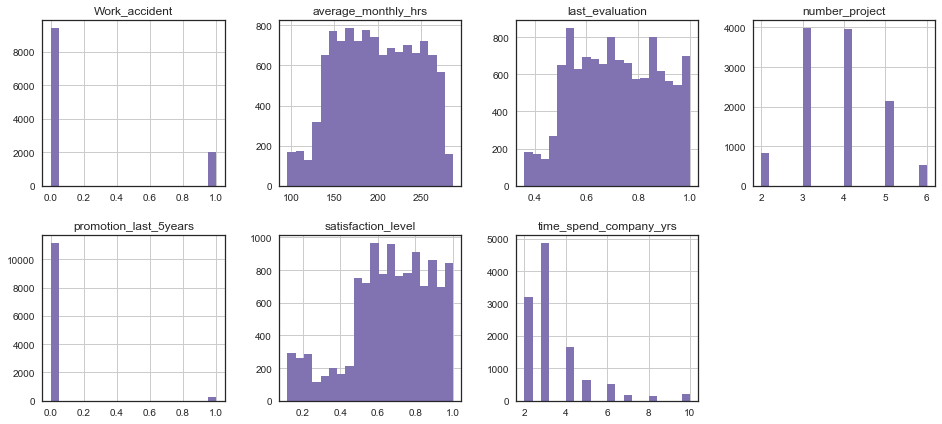

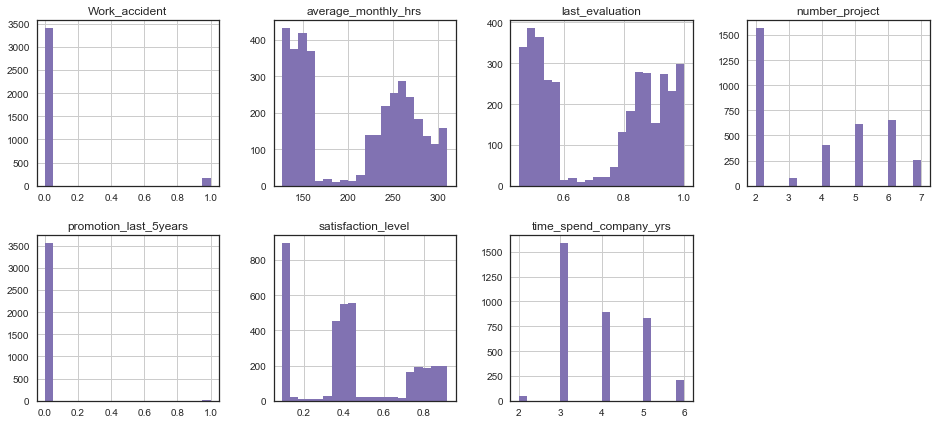

In [8]:
d.groupby('left').hist(color='m', bins=20, layout=(2,4), figsize=(16,7))

See some statistics about the above graph:

In [9]:
# monthly hours
print('Monthly hours:')
print('stayed vs left:', round(d[d['left'] == 0].average_monthly_hrs.mean(),2), 'vs', round(d[d['left'] == 1].average_monthly_hrs.mean(),2))
# last evaluation
print('\nLast evaluation:')
print('stayed vs left:', round(d[d['left'] == 0].last_evaluation.mean(),2), 'vs', round(d[d['left'] == 1].last_evaluation.mean(),2))
# Number of projects
print('\nNumber of projects:')
print('stayed vs left:', round(d[d['left'] == 0].number_project.mean(),2), 'vs', round(d[d['left'] == 1].number_project.mean(),2))
print('stayed vs left - proportion of projects >= 6:', 
      round(d[(d['left'] == 0) & (d['number_project'] >= 6)].number_project.count() / d[(d['left'] == 0)].number_project.count() * 100,2), '%',
      'vs',
      round(d[(d['left'] == 1) & (d['number_project'] >= 6)].number_project.count() / d[(d['left'] == 1)].number_project.count() * 100,2), '%'
     )
# Satisfaction Level
print('\nSatisfaction level:')
print('stayed vs left:', round(d[d['left'] == 0].satisfaction_level.mean(),2), 'vs', round(d[d['left'] == 1].satisfaction_level.mean(),2))
# Time in company
print('\nTime in company:')
print('stayed vs left:', round(d[d['left'] == 0].time_spend_company_yrs.mean(),2), 'vs', round(d[d['left'] == 1].time_spend_company_yrs.mean(),2))

Monthly hours:
stayed vs left: 199.06 vs 207.42

Last evaluation:
stayed vs left: 0.72 vs 0.72

Number of projects:
stayed vs left: 3.79 vs 3.86
stayed vs left - proportion of projects >= 6: 4.54 % vs 25.51 %

Satisfaction level:
stayed vs left: 0.67 vs 0.44

Time in company:
stayed vs left: 3.38 vs 3.88


The above grouped charts and statistics indicate that:
- monthly hours: people who stayed worked less than who left, but more centered; left people either worked little or a lot;
- last evaluation: averages are equal, both 0.72, but again, left people either had very bad or great evaluations;
- number of projects: averages are similar, but a much larger proportion of left people had 6 projects or more;
- satisfaction level: people who stayed were more satisfied than who left;
- time in company: people who stayed spent fewer years than who left.

There are still two missing parts - "salary" and "department", which are categorical parts. We may convert these two features to numerical values later. For now, let's see if employees' salary and department plays a role.

#### 2.2.2 Explore other two object features: salary & department
Employee's with low and medium salaries have higher chance of leaving. 

In [10]:
d[['salary', 'left']].groupby(['salary'], as_index=False).mean().sort_values(by='left', ascending=False)

,salary,left
1,low,0.296884
2,medium,0.204313
0,high,0.066289


Employees of different departments differ in their choice of leaving. 

In [11]:
d[['department', 'left']].groupby(['department'], as_index=False).mean().sort_values(by='left', ascending=False)

,department,left
3,hr,0.290934
2,accounting,0.265971
9,technical,0.256250
8,support,0.248991
7,sales,0.244928
5,marketing,0.236597
0,IT,0.222494
6,product_mng,0.219512
1,RandD,0.153748
4,management,0.144444


#### 2.2.3 Satisfaction Level & Salary

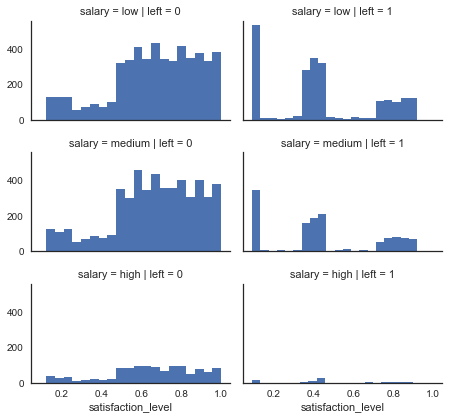

In [12]:
sns.FacetGrid(d, col='left', row='salary', size=2, aspect=1.6)\
   .map(plt.hist, 'satisfaction_level', bins=20)

#### 2.2.4 Satisfaction Level & Number of Projects
We can see that left people who had 6 or more projects have very low satisfaction levels.

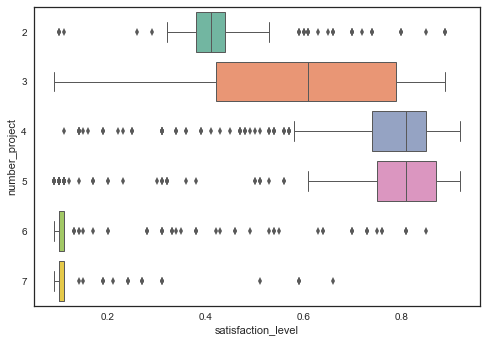

In [13]:
sns.boxplot(data=d[d['left'] == 1], orient='h', x='satisfaction_level', y='number_project', palette='Set2', linewidth=1)

#### 2.2.5 Department & Salary
At a glance, we can tell that for employees of all departments with low and medium salaries, the relationship between their number of projects and leavings is positive when they have 3 or more projects. However, this relationship is more diverse with high salary people among departments.

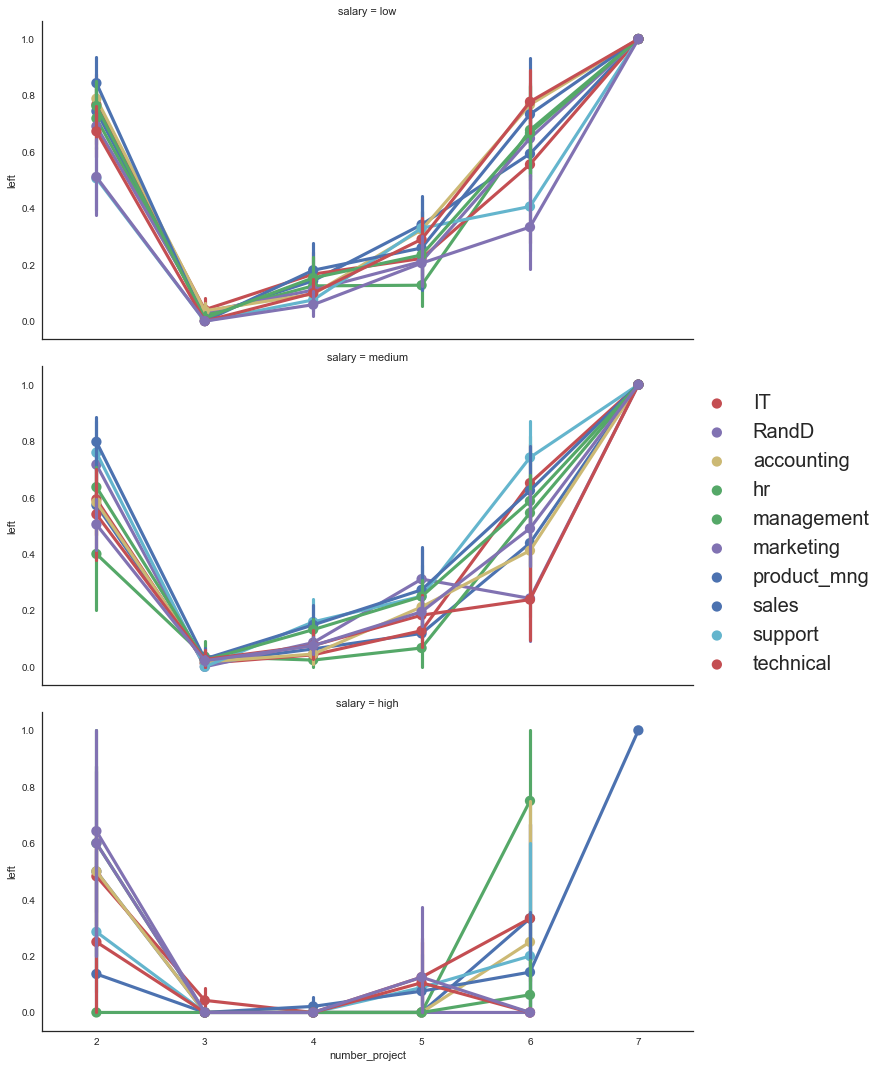

In [14]:
sns.FacetGrid(d, row='salary', size=5, aspect=2)\
   .map(sns.pointplot, 'number_project', 'left', 'department', palette='deep')\
   .add_legend(prop={'size':20})

####  2.2.6 Left - Average monthly hours & Number of Projects
This plot proves one point we made previously that average_monthly_hours and number_project is positively related, especially for left people having done 4 or more projects

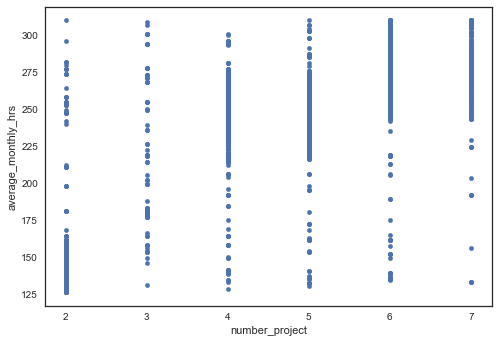

In [15]:
d[d['left'] == 1].plot(kind='scatter', x='number_project', y='average_monthly_hrs')

## 3. Modeling Preparation
Before hurrying to a pool of machine learning models, firstly we should again take a look at our featurs and convert some features to other formats in order to fit most models. Then we can apply specific models.

### 3.1 Feature Engineering

#### 3.1.1 Converting *salary* to categorical values
- low = 0
- medium = 1 
- high = 2

In [16]:
d['salary'] = d['salary'].map({'low': 0, 'medium': 1, 'high': 2}).astype(int)
d.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hrs,time_spend_company_yrs,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


#### 3.1.2 Converting *department* to categorical values
- management  = 0
- hr          = 1
- accounting  = 2
- RandD       = 3
- marketing   = 4
- product_mng = 5
- IT          = 6
- support     = 7
- technical   = 8
- sales       = 9

In [17]:
d['department'] = d['department'].map({'management': 0, 'hr': 1, 'accounting': 2, 'RandD': 3, 'marketing': 4, 'product_mng': 5, 'IT': 6, 'support': 7, 'technical': 8, 'sales': 9}).astype(int)
d.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hrs,time_spend_company_yrs,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,9,0
1,0.80,0.86,5,262,6,0,1,0,9,1
2,0.11,0.88,7,272,4,0,1,0,9,1
3,0.72,0.87,5,223,5,0,1,0,9,0
4,0.37,0.52,2,159,3,0,1,0,9,0


#### 3.1.3 Converting *satisfaction_level* to ordinal values
From the distributions we saw perviously, we divide satisfaction levels into 3 ordinal categories:
- 0-0.4: low = 0
- 0.4-0.8: medium = 1
- 0.8-1: high = 2

In [18]:
d.loc[d['satisfaction_level'] <= 0.4, 'satisfaction_level'] = 0
d.loc[(d['satisfaction_level'] > 0.4) & (d['satisfaction_level'] <= 0.8), 'satisfaction_level'] = 1
d.loc[(d['satisfaction_level'] > 0.8) & (d['satisfaction_level'] <= 1), 'satisfaction_level'] = 2

d['satisfaction_level'] = d['satisfaction_level'].astype(int)

d.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hrs,time_spend_company_yrs,Work_accident,left,promotion_last_5years,department,salary
0,0,0.53,2,157,3,0,1,0,9,0
1,2,0.86,5,262,6,0,1,0,9,1
2,0,0.88,7,272,4,0,1,0,9,1
3,2,0.87,5,223,5,0,1,0,9,0
4,0,0.52,2,159,3,0,1,0,9,0


#### 3.1.4 Converting *last_evaluation* to ordinal values
From the distributions we saw perviously, we divide last evalutions into 3 ordinal categories:
- 0-0.6: low = 0
- 0.6-0.8: medium = 1
- 0.8-1: high = 2

In [19]:
d.loc[d['last_evaluation'] <= 0.6, 'last_evaluation'] = 0
d.loc[(d['last_evaluation'] > 0.6) & (d['last_evaluation'] <= 0.8), 'last_evaluation'] = 1
d.loc[(d['last_evaluation'] > 0.8) & (d['last_evaluation'] <= 1), 'last_evaluation'] = 2

d['last_evaluation'] = d['last_evaluation'].astype(int)

d.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hrs,time_spend_company_yrs,Work_accident,left,promotion_last_5years,department,salary
0,0,0,2,157,3,0,1,0,9,0
1,2,2,5,262,6,0,1,0,9,1
2,0,2,7,272,4,0,1,0,9,1
3,2,2,5,223,5,0,1,0,9,0
4,0,0,2,159,3,0,1,0,9,0


#### 3.1.5 Converting *average_monthly_hrs* to ordinal values
From the distributions we saw perviously, we divide average monthly hours into 4 ordinal categories:
- 0-150: low = 0
- 150-200: medium = 1
- 200-250: high = 2
- 250-350: very high = 3

In [20]:
d.loc[d['average_monthly_hrs'] <= 150, 'average_monthly_hrs'] = 0
d.loc[(d['average_monthly_hrs'] > 150) & (d['average_monthly_hrs'] <= 200), 'average_monthly_hrs'] = 1
d.loc[(d['average_monthly_hrs'] > 200) & (d['average_monthly_hrs'] <= 250), 'average_monthly_hrs'] = 2
d.loc[(d['average_monthly_hrs'] > 250) & (d['average_monthly_hrs'] <= 350), 'average_monthly_hrs'] = 3

d.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hrs,time_spend_company_yrs,Work_accident,left,promotion_last_5years,department,salary
0,0,0,2,1,3,0,1,0,9,0
1,2,2,5,3,6,0,1,0,9,1
2,0,2,7,3,4,0,1,0,9,1
3,2,2,5,2,5,0,1,0,9,0
4,0,0,2,1,3,0,1,0,9,0


### 3.2 Assemble final datasets for modelling
Credit: https://www.kaggle.com/estepona/titanic/an-interactive-data-science-tutorial

Split dataset into training set and test set. Also split dataset into a matrix (X) of input data and a vector (Y) of target (label).

#### 3.2.1 Variable selection 

While some features are more important than others, since basically all features have influence on the target, we choose to include all variables.

#### 3.2.2 Create datasets
Below we will seperate the data into training and test datasets.

In [21]:
X = d.drop(['left'], axis=1)
y = d.left
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
print(X.shape , X_train.shape , y_train.shape , X_test.shape , y_test.shape)

(14999, 9) (11249, 9) (11249,) (3750, 9) (3750,)


#### 3.2.3 Feature importance
Also credit to Helge Bjorland & Stian Eide, who are so awesome using a decision tree to determine and plot the feature importance.

It turns out that some features are clearly more important than others.

0.981331673927


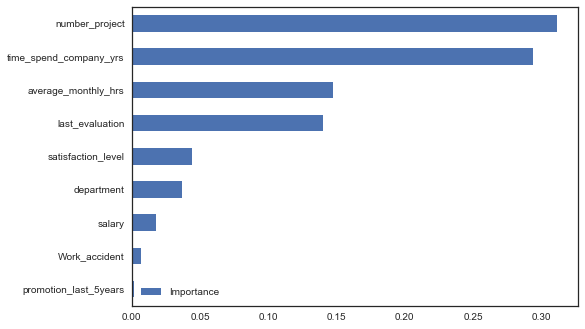

In [23]:
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )

plot_variable_importance(X_train, y_train)

## 4.0 Modeling
As a classification problem, I'm going to apply the following machine learning models:
- Logistic Regression
- Decision Tree
- Gaussian Naive Bayes
- KNN (K Nearest Neighbors)
- SVM (Support Vector Machines)

### 4.1 Define Model Scoring Functions
Credit: https://www.kaggle.com/jeffd23/titanic/scikit-learn-ml-from-start-to-finish

I'll use two scores to test how fit a model is: 
- confidence score
- accuracy score

In [24]:
def model_scores(dataset, trained_model):
    # global variables
    global X_train, y_train, X_test, y_test
    # confidence score
    conf_score = round(trained_model.score(X_train, y_train) * 100, 2)
    print("1. confidence score:", conf_score)
    # accuracy score
    kf = KFold(len(d), n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        trained_model.fit(X_train, y_train)
        pred = trained_model.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        outcomes.append(accuracy)
    mean_outcome = round(np.mean(outcomes) * 100, 2)
    print("2. accuracy   score: {0}".format(mean_outcome))
    # record scores
    return conf_score, mean_outcome

### 4.2 Logistic Regression
Logistic Regression is good to start with. It's a great model that takes categorical or ordianl independent variables to estimate a dependent variable with values of either 0 or 1. 

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_scores = model_scores(d, lr)

1. confidence score: 79.37
2. accuracy   score: 76.42


### 4.3 Decision Tree
Decision Tree model is perfect for our dataset because it's small and we have converted all basically all features to categorical or ordinal variables. 

We can see that both the confidence score and accuracy score of this model are high.

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_scores = model_scores(d, dt)

1. confidence score: 98.06
2. accuracy   score: 95.75


### 4.4 Gaussian Naive Bayes
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. It is fast compared to other models, but also tend to be less accurate. Our model implements the Gaussian Naive Bayes algorithm for classification. 

In [27]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_scores = model_scores(d, gnb)

1. confidence score: 82.24
2. accuracy   score: 77.74


### 4.5 KNN (K Nearest Neighbors)
Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. KNeighborsClassifier implements learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user.

Here we specify k = 3 (default is 5), which gives us the highest socores.

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_scores = model_scores(d, knn)

1. confidence score: 96.69
2. accuracy   score: 94.93


### 4.6 SVM (Support Vector Machines)
Although a bit slower, SVM is one of the most popular machine learning models because it's more effective in high dimensional spaces, and can be used for classification, regression, and outliers detection.

In [29]:
svc = SVC()
svc.fit(X_train, y_train)
svc_scores = model_scores(d, svc)

1. confidence score: 96.05
2. accuracy   score: 95.63


## 5. Evaluation
Having applied five machine learning models in section four, and obtained two scores for each model, we can now evaluate the models by creating a barplot and compare them.
### 5.1 Results

In [30]:
# construct model scores to dataframe
model_list = ['Logistic Regression', 'Logistic Regression', 'Decision Tree', 'Decision Tree', 'Gaussian Naive Bayes', 'Gaussian Naive Bayes', 'KNN', 'KNN', 'SVM', 'SVM']
two_type = ['confidence', 'accuracy']
score_type = []
for i in range(5):
    score_type += two_type
score_values = [81.27, 76.42, 98.06, 95.85, 82.24, 77.74, 96.69, 94.93, 96.05, 95.63]
model_pd = {'Model': model_list,
            'Score Type': score_type,
            'Score Value': score_values}
model_pd = pd.DataFrame(model_pd)
model_pd

,Model,Score Type,Score Value
0,Logistic Regression,confidence,81.27
1,Logistic Regression,accuracy,76.42
2,Decision Tree,confidence,98.06
3,Decision Tree,accuracy,95.85
4,Gaussian Naive Bayes,confidence,82.24
5,Gaussian Naive Bayes,accuracy,77.74
6,KNN,confidence,96.69
7,KNN,accuracy,94.93
8,SVM,confidence,96.05
9,SVM,accuracy,95.63


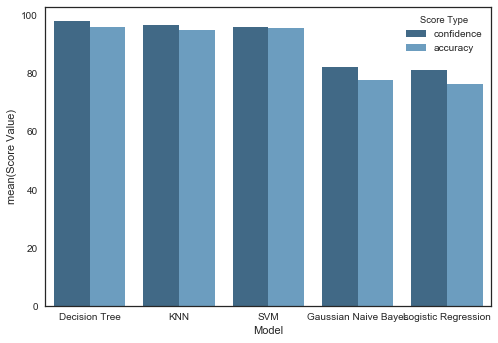

In [31]:
# barplot
sns.barplot(data=model_pd.sort_values(by='Score Value', ascending=False) , x='Model', y='Score Value', hue='Score Type', palette="Blues_d")

From the plot we can tell that Decision Tree works the best for our dataset, although KNN and SVM are very close in terms of scores. Gaussian Naive Bayes and Logistic Regression turned out to be less effective estimators.

Given the results, we gain more insights into the reasons why employees left. Having identified the most effective models, we are confident to predict whether an employee could be leaving based on features such as his or her satisfaction level and number of projects. 

### 5.2 Limitations and Next Step
Although some of our models have very high scores (over 95) predicting whether an employee would leave or stay, it is possible that some of our models overfit for some features may not be independent to each other. For example, average monthly hours of an employee is likely to have an impact on his or her satisfaction level.  

Another limitation is my lack of in-depth understanding of models and how to properly manipulate model parameters, like number of k in KNN model. The lack of experience in the dataset domain may also lead to a poorer selection of models. 

However, as I practice and learn more, I believe that I'll do better in the future.